<a href="https://colab.research.google.com/github/AkhmadRamadani/PCVK_GENAP_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIODATA
> Akhmad Ramadani

> TI-3B

> 03

> 2041720002

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#### Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED)


In [3]:
def dilation(img, kernel, padding=0):
    # get image shape
    img_shape = img.shape
    # get kernel shape
    kernel_shape = kernel.shape
    # get padding size
    padding_size = padding
    # create output image
    output = np.zeros(img_shape)
    # pad image
    img = np.pad(img, padding_size, mode='constant', constant_values=0)
    # iterate over image
    for i in range(img_shape[0]):
        for j in range(img_shape[1]):
            # get max value
            max_value = 0
            for k in range(kernel_shape[0]):
                for l in range(kernel_shape[1]):
                    if kernel[k, l] == 1:
                        if img[i + k, j + l] > max_value:
                            max_value = img[i + k, j + l]
            output[i, j] = max_value
    return output

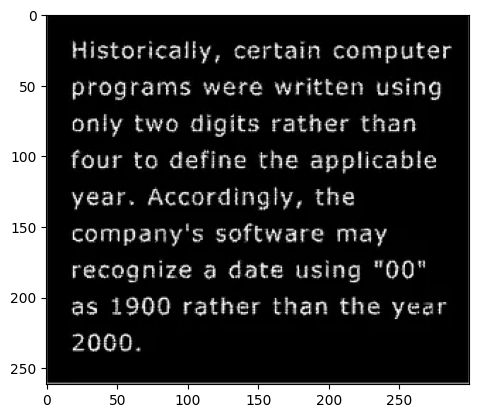

In [4]:
img_morph = cv.imread('/content/drive/MyDrive/Polinema/Semester 6/PCVK/Images/morphology.png')
plt.imshow(img_morph)

3. berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png)


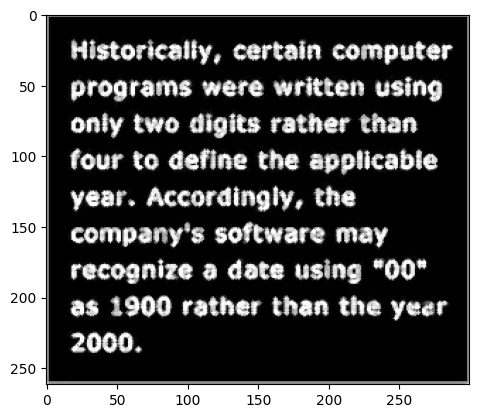

In [18]:
cross_kernel = np.array(
    [
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0],
    ], np.uint8
)
img_morph_2D = img_morph[:,:,0]

dilation_img = dilation(img_morph_2D, cross_kernel, padding=1)

plt.imshow(dilation_img, cmap='gray')

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png, dan cetak Structuring Element-nya)

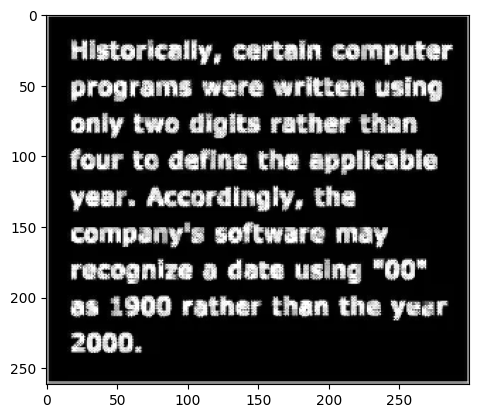

In [6]:
# dilation using opencv
dilation_img_cv = cv.dilate(img_morph_2D, kernel=cross_kernel, iterations=1)

#show image
plt.imshow(dilation_img_cv, cmap='gray')


#### FUNGSI EROSI

In [7]:
# erosion function
def erosion(img, kernel, padding=0):
    # get image shape
    img_shape = img.shape
    # get kernel shape
    kernel_shape = kernel.shape
    # get padding size
    padding_size = padding
    # create output image
    output = np.zeros(img_shape)
    # pad image
    img = np.pad(img, padding_size, mode='constant', constant_values=0)
    # iterate over image
    for i in range(img_shape[0]):
        for j in range(img_shape[1]):
            # get min value
            min_value = 255
            for k in range(kernel_shape[0]):
                for l in range(kernel_shape[1]):
                    if kernel[k, l] == 1:
                        if img[i + k, j + l] < min_value:
                            min_value = img[i + k, j + l]
            output[i, j] = min_value
    return output

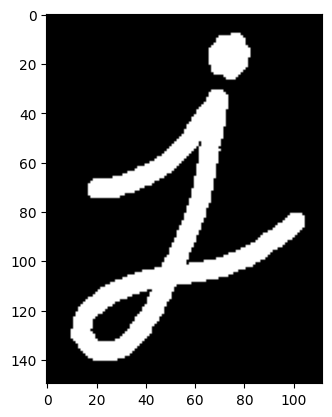

In [8]:
img_morph_j = cv.imread('/content/drive/MyDrive/Polinema/Semester 6/PCVK/Images/j.png')
img_morph_j = cv.cvtColor(img_morph_j, cv.COLOR_BGR2GRAY)
plt.imshow(img_morph_j, cmap='gray')

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

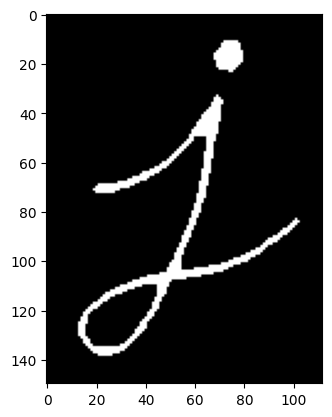

In [9]:
structuring_element = np.array(
    [
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]
    ]
)

erosion_img = erosion(img_morph_j, structuring_element, padding=2)

plt.imshow(erosion_img, cmap='gray')

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

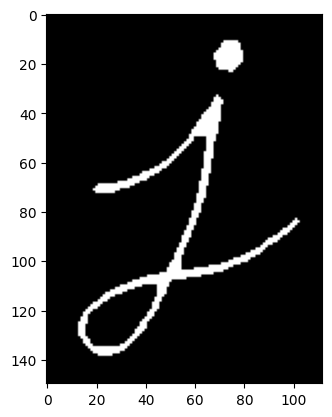

In [10]:
# erosion using opencv
erosion_img_cv = cv.erode(img_morph_j, kernel=structuring_element, iterations=1)

#show image
plt.imshow(erosion_img_cv, cmap='gray')

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

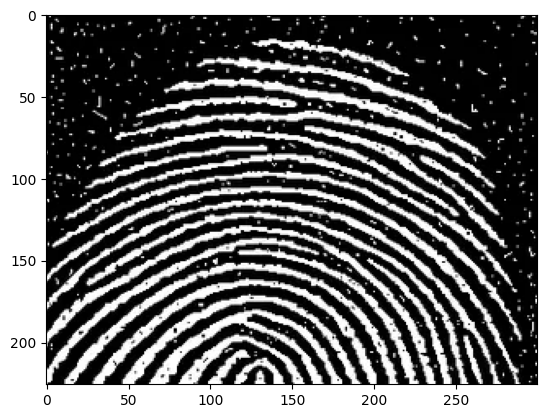

In [11]:
img_morph_fingerprint = cv.imread('/content/drive/MyDrive/Polinema/Semester 6/PCVK/Images/fingerprint.png')
img_morph_fingerprint = cv.cvtColor(img_morph_fingerprint, cv.COLOR_BGR2GRAY)
plt.imshow(img_morph_fingerprint, cmap='gray')

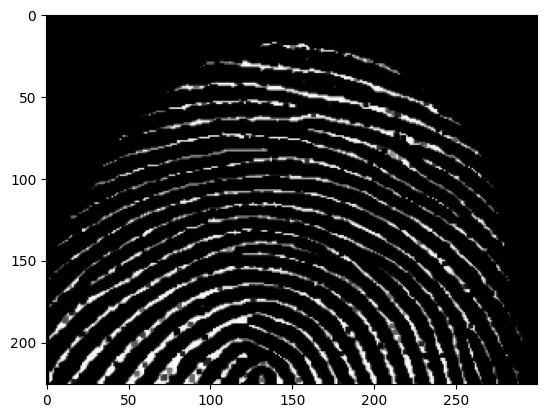

In [12]:
strel_3 = np.array(
    [
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
    ], np.uint8
)

erosion_fp_opening = erosion(img_morph_fingerprint, strel_3, padding=2)


plt.imshow(erosion_fp_opening, cmap='gray')

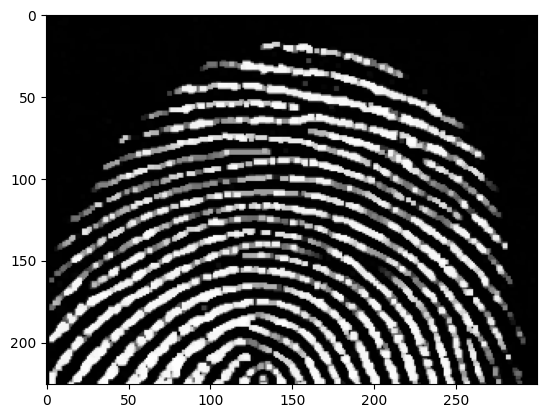

In [13]:
dilation_fp_opening = dilation(erosion_fp_opening, strel_3, padding=2)

plt.imshow(dilation_fp_opening, cmap='gray')

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

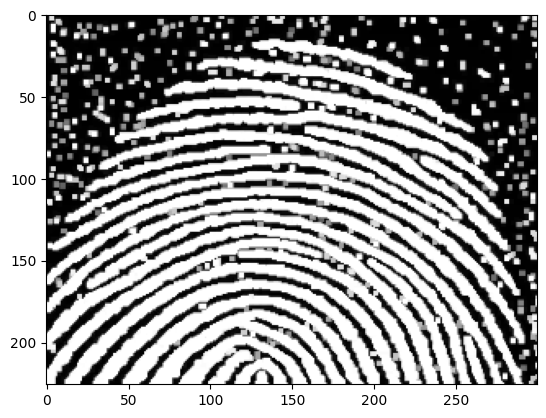

In [14]:
dilation_fp_closing = dilation(img_morph_fingerprint, strel_3, padding=2)

plt.imshow(dilation_fp_closing, cmap='gray')

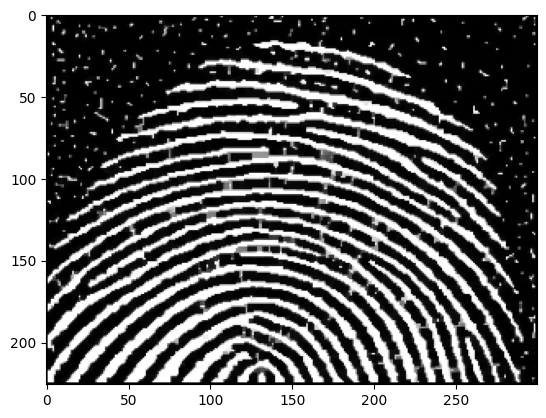

In [15]:
erosion_fp_closing = erosion(dilation_fp_closing, strel_3, padding=1)

plt.imshow(erosion_fp_closing, cmap='gray')

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

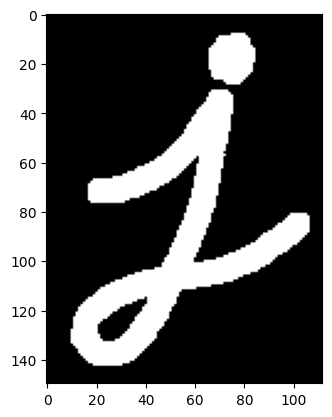

In [23]:
strel_cross_3 = np.array(
    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1],
    ], np.uint8
)


strel_cross_3_img = dilation(img_morph_j, strel_cross_3, padding=2)

plt.imshow(strel_cross_3_img, cmap='gray')

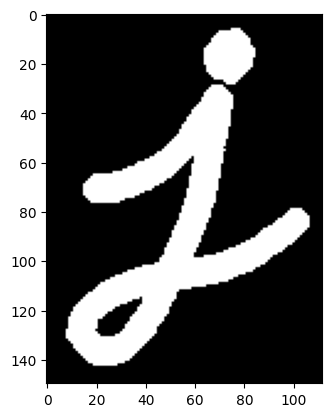

In [21]:
strel_cross_5 = np.array(
     [
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0]
    ], np.uint8
)


strel_cross_5_img = dilation(img_morph_j, strel_cross_5, padding=2)

plt.imshow(strel_cross_5_img, cmap='gray')

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

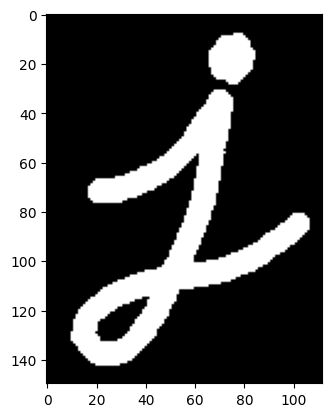

In [25]:
se_circle_3 = np.array([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]], dtype=np.uint8)

se_circle_3_img = dilation(img_morph_j, se_circle_3, padding=2)

plt.imshow(se_circle_3_img, cmap='gray')

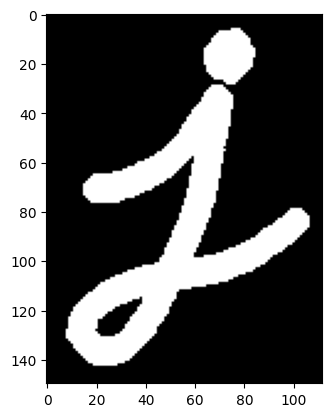

In [26]:
se_circle_5 = np.array([[0, 0, 1, 0, 0],
                        [0, 1, 1, 1, 0],
                        [1, 1, 1, 1, 1],
                        [0, 1, 1, 1, 0],
                        [0, 0, 1, 0, 0]], dtype=np.uint8)

se_circle_5_img = dilation(img_morph_j, se_circle_5, padding=2)

plt.imshow(se_circle_5_img, cmap='gray')

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

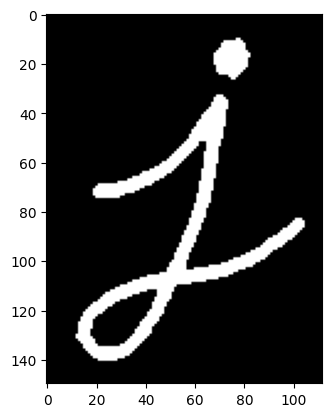

In [30]:
se_rect_3 = np.ones((3, 3), dtype=np.uint8)

se_rect_3_img = erosion(img_morph_j, se_rect_3, padding=2)

plt.imshow(se_rect_3_img, cmap='gray')

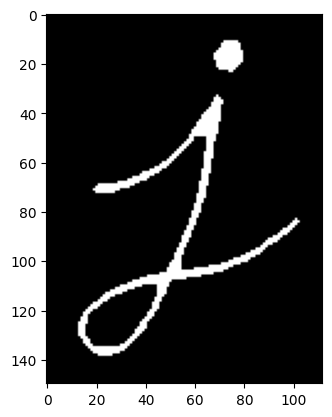

In [29]:
se_rect_5 = np.ones((5, 5), dtype=np.uint8)

se_rect_5_img = erosion(img_morph_j, se_rect_5, padding=2)

plt.imshow(se_rect_5_img, cmap='gray')

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

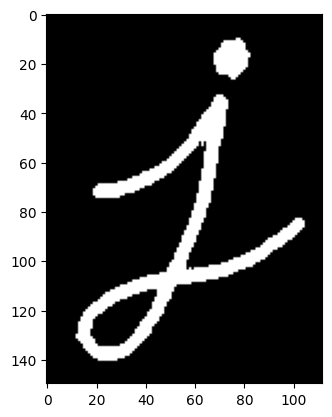

In [31]:
se_line_vert_3 = np.array([[1, 0, 1],
                           [1, 0, 1],
                           [1, 0, 1]], dtype=np.uint8)

se_line_vert_3_img = erosion(img_morph_j, se_line_vert_3, padding=2)

plt.imshow(se_line_vert_3_img, cmap='gray')

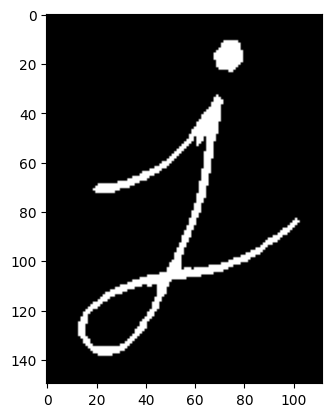

In [32]:
se_line_vert_5 = np.array([[1, 0, 0, 0, 1],
                           [1, 0, 0, 0, 1],
                           [1, 0, 0, 0, 1],
                           [1, 0, 0, 0, 1],
                           [1, 0, 0, 0, 1]], dtype=np.uint8)


se_line_vert_5_img = erosion(img_morph_j, se_line_vert_5, padding=2)

plt.imshow(se_line_vert_5_img, cmap='gray')